Code to simulate finite system size dynamics for the main script with the mean-field results

In [2]:
from qutip import *
import qutip.piqs as piqs
import numpy as np
import time
import matplotlib.pyplot as plt

In [292]:
plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 22,        # Axis title
    "axes.labelsize": 20,         # Axis labels
    "xtick.labelsize": 18,        # X-ticks
    "ytick.labelsize": 18,        # Y-ticks
    "legend.fontsize": 18,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})

In [4]:
# Parameters
N_A=N_B=2
N=N_A+N_B               # Number of spins
###Original parameters
kappa = 1.0
g = 0.1*kappa
eta = 0.25*g

#Rescaled
Gamma = 4*g**2/kappa
Xi = 2*g*eta/kappa

DeltaA = 0.1*g 
DeltaB = 0.1*g

ϕ =3*np.pi/5         # Phase factor


In [4]:

Jp_A=tensor(jmat(int(N_A),'+'),qeye(int(2*N_B+1)))
Jm_A=tensor(jmat(int(N_A),'-'),qeye(int(2*N_B+1)))
# Jx_A=tensor(jmat(int(N_A),'x'),qeye(int(2*N_B+1)))
# Jy_A=tensor(jmat(int(N_A),'y'),qeye(int(2*N_B+1)))
Jx_A = 1/2 * (Jp_A + Jm_A)
Jy_A = 1/(2j) * (Jp_A - Jm_A)
Jz_A = 1/2 * (Jp_A*Jm_A - Jm_A*Jp_A) 


Jp_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'+'))#/np.sqrt(2)
Jm_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'-'))#/np.sqrt(2)
# Jx_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'x'))#*np.sqrt(2)
# Jy_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'y'))#*np.sqrt(2)
# Jz_B=tensor(qeye(int(2*N_A+1)),jmat(int(N_B),'z'))
Jx_B = 1/2 * (Jp_B + Jm_B)
Jy_B = 1/(2j) * (Jp_B - Jm_B)
Jz_B = 1/2 * (Jp_B*Jm_B - Jm_B*Jp_B) 

Jp=Jp_A+Jp_B
Jm=Jm_A+Jm_B
Jx=Jx_A+Jx_B
Jy=Jy_A+Jy_B
Jz=Jz_A+Jz_B

J_sq_A = Jx_A**2 + Jy_A**2 + Jz_A**2
J_sq_B = Jx_B**2 + Jy_B**2 + Jz_B**2
J_sq_total = (Jx_A + Jx_B)**2 + (Jy_A + Jy_B)**2 + (Jz_A + Jz_B)**2


H= - DeltaA * Jz_A - DeltaB * Jz_B + Xi * ( Jm_A  + Jp_A + np.exp(-1j*ϕ) * Jm_B + np.exp(1j*ϕ) * Jp_B)

c_ops=[np.sqrt(Gamma/N)*(Jm_A + np.exp(-1j*ϕ)*Jm_B)]

In [5]:
tim=np.linspace(0,150/(Gamma),2000)

# Initialize both spins as coherent states along +x
psi_A = spin_coherent(N_A, np.pi/2, 0)  # Spin-A: θ=π/2 (x), φ=0
psi_B = spin_coherent(N_B, np.pi/2, 0)  # Spin-B: θ=π/2 (x), φ=0
psi = tensor(psi_A, psi_B)
Rho0 = psi * psi.dag()


##Check if initial state is eigenstate and normalized
print("⟨Jx_A⟩ =", expect(Jx_A, Rho0)) 
print("⟨Jx_B⟩ =", expect(Jx_B, Rho0)) 
print("Norm: ", Rho0.norm()) 


⟨Jx_A⟩ = 2.0
⟨Jx_B⟩ = 2.0
Norm:  1.0


In [131]:
start = time.time()

result0 = mesolve(H, Rho0, tim, c_ops, [Jz_A,Jz_B, Jz, J_sq_A, J_sq_B])

# result0 = mcsolve(H, psi, tim, c_ops, [Qobj(Jz_A),Qobj(Jz_B), Jz, J_sq_A, J_sq_B], ntraj=500)

end = time.time()
print("Total time taken by mesolve is",end - start)

Total time taken by mesolve is 0.245513916015625


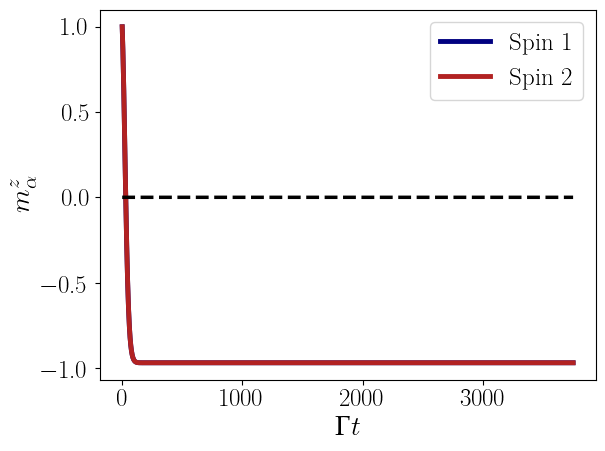

In [132]:
# data_mf1 = np.loadtxt("mf_data1.txt")
# data_mf2 = np.loadtxt("mf_data2.txt")

plt.plot(tim,result0.expect[0]/N_A,label=r'Spin 1', linewidth=3.5, color='navy')
plt.plot(tim,result0.expect[1]/N_B,label=r'Spin 2', linewidth=3.5, color='firebrick')
# plt.plot(tim, data_mf1, lw=3, color='navy', linestyle='--', alpha=0.2)
# plt.plot(tim, data_mf2, lw=3, color='red', linestyle='--', alpha=0.2)   
plt.plot(tim,0 *tim,linestyle='--', lw=2.5, color='black')
plt.ylabel(r'$m^z_{\alpha}$')
plt.xlabel(r'$\Gamma t$')
plt.legend()
plt.show()

Peak frequency A = 0.0002665333333333334
Peak frequency B = 0.0002665333333333334


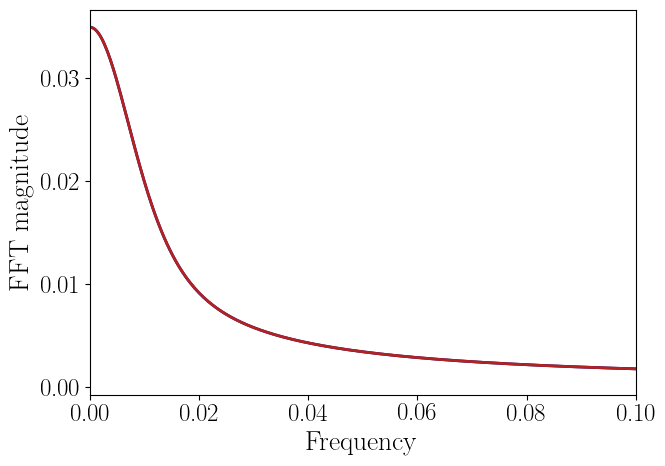

In [133]:
sigA = result0.expect[0] / N_A     
sigB = result0.expect[1] / N_B      
t = tim                             

# --- FFT preparation ---
dt = t[1] - t[0]
N = len(t)
freqs = np.fft.fftfreq(N, d=dt)
pos = freqs > 0                    

# --- FFT of both species ---
fftA = np.fft.fft(sigA)
fftB = np.fft.fft(sigB)


magA = 2.0 * np.abs(fftA) / N
magB = 2.0 * np.abs(fftB) / N

# --- argmax / peak frequencies ---
peak_freq_A = freqs[pos][np.argmax(magA[pos])]
peak_freq_B = freqs[pos][np.argmax(magB[pos])]
print(f"Peak frequency A = {peak_freq_A}")
print(f"Peak frequency B = {peak_freq_B}")

# --- PLOT FFTs ---
plt.figure(figsize=(7,5))
plt.plot(freqs[pos], magA[pos], c= 'navy', label='FFT Spin A', lw=2)
plt.plot(freqs[pos], magB[pos],c = 'firebrick', label='FFT Spin B', lw=2)
plt.xlim(0,10*DeltaA)
# mark maxima
# plt.axvline(peak_freq_A, color='navy', ls='--', alpha=0.6)
# plt.axvline(peak_freq_B, color='firebrick', ls='--', alpha=0.6)

plt.xlabel("Frequency")
plt.ylabel("FFT magnitude")
plt.tight_layout()
plt.show()

In [ ]:
max_j = 3
for j in range(1, max_j + 1):
    N_A = N_B = j
    ϕ = 0
    dimA = int(2 * N_A + 1)
    dimB = int(2 * N_B + 1)
    DeltaA = 0.01
    DeltaB = 0.01
    # build spin operators
    Jp_A = tensor(jmat(float(N_A), '+'), qeye(dimB))
    Jm_A = tensor(jmat(float(N_A), '-'), qeye(dimB))
    Jz_A = 0.5 * (Jp_A * Jm_A - Jm_A * Jp_A)

    Jp_B = tensor(qeye(dimA), jmat(float(N_B), '+'))
    Jm_B = tensor(qeye(dimA), jmat(float(N_B), '-'))
    Jz_B = 0.5 * (Jp_B * Jm_B - Jm_B * Jp_B)

    H = - DeltaA * Jz_A - DeltaB * Jz_B + Xi * (Jm_A + Jp_A + np.exp(-1j*ϕ) * Jm_B + np.exp(1j*ϕ) * Jp_B)
    c_op = np.sqrt(Gamma / (N_A + N_B)) * (Jm_A + np.exp(-1j * ϕ) * Jm_B)
    c_ops = [c_op]

    L = liouvillian(H, c_ops)
    # compute eigenvalues
    evals = L.eigenenergies(sort='high', tol=1e-5)
    sorted_indices = np.argsort(-np.real(evals))
    evals = evals[sorted_indices]

    # Plot
    plt.figure(figsize=(6,5))
    plt.scatter(np.real(evals), np.imag(evals), s=12, color='k')
    plt.axvline(0, linestyle='--')
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.xlim(-0.1,0.005)
    plt.ylim(-0.1,0.1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



NameError: name 'tensor' is not defined

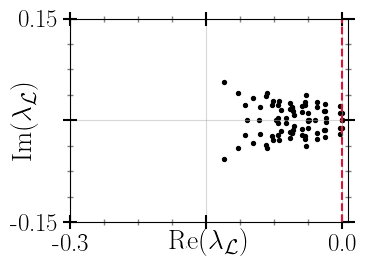

In [351]:
#max_j = 3
#for j in range(1, max_j + 1):
j = 1
N_A = N_B = j
ϕ = 0#1/2*np.pi
dimA = int(2 * N_A + 1)
dimB = int(2 * N_B + 1)
DeltaA = 0.01
DeltaB = 0.01
# build spin operators
Jp_A = tensor(jmat(float(N_A), '+'), qeye(dimB))
Jm_A = tensor(jmat(float(N_A), '-'), qeye(dimB))
Jz_A = 0.5 * (Jp_A * Jm_A - Jm_A * Jp_A)

Jp_B = tensor(qeye(dimA), jmat(float(N_B), '+'))
Jm_B = tensor(qeye(dimA), jmat(float(N_B), '-'))
Jz_B = 0.5 * (Jp_B * Jm_B - Jm_B * Jp_B)

H = - DeltaA * Jz_A - DeltaB * Jz_B + Xi * (Jm_A + Jp_A + np.exp(-1j*ϕ) * Jm_B + np.exp(1j*ϕ) * Jp_B)
c_op = np.sqrt(Gamma / (N_A + N_B)) * (Jm_A + np.exp(-1j * ϕ) * Jm_B)
c_ops = [c_op]

L = liouvillian(H, c_ops)
# compute eigenvalues
evals = L.eigenenergies(sort='high', tol=1e-6)
sorted_indices = np.argsort(-np.real(evals))
evals = evals[sorted_indices]

# Plot
fig, ax = plt.subplots(figsize=(4,3))
plt.scatter(np.real(evals), np.imag(evals), s=8, color='k')
plt.axvline(0, linestyle='--', color='crimson')
plt.xlabel(r"Re($\lambda_\mathcal{L}$)", labelpad=-20)
plt.ylabel(r"Im($\lambda_\mathcal{L}$)", labelpad=-20)
plt.yticks([-0.15,0,0.15], [-0.15, '', 0.15])
plt.xticks([-0.3, -0.15, 0], [-0.3, '', 0.0])
# plt.xlim(-0.0001,0.0001)
# plt.ylim(-0.1,0.1)

ax.tick_params(which='both', direction='inout', 
                top=True, right=True, bottom=True, left=True)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', 
                length=10, width=1.5, colors='black')
ax.tick_params(axis='both', which='minor', 
                length=5, width=1, colors='gray')
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()



In [ ]:
# Define parameters
cases = [
    {"DeltaA": 0.0, "DeltaB": 0.0, "title": r"$\Delta_A = \Delta_B = 0$"},
    {"DeltaA": 0.01, "DeltaB": 0.01, "title": r"$\Delta_A = \Delta_B = 0.01$"}
]

j = 3
N_A = N_B = j
ϕ = 0
dimA = int(2 * N_A + 1)
dimB = int(2 * N_B + 1)

# Compute and store Liouvillian spectra
spectra = []
for case in cases:
    DeltaA = case["DeltaA"]
    DeltaB = case["DeltaB"]

    Jp_A = tensor(jmat(float(N_A), '+'), qeye(dimB))
    Jm_A = tensor(jmat(float(N_A), '-'), qeye(dimB))
    Jz_A = 0.5 * (Jp_A * Jm_A - Jm_A * Jp_A)

    Jp_B = tensor(qeye(dimA), jmat(float(N_B), '+'))
    Jm_B = tensor(qeye(dimA), jmat(float(N_B), '-'))
    Jz_B = 0.5 * (Jp_B * Jm_B - Jm_B * Jp_B)

    H = - DeltaA * Jz_A - DeltaB * Jz_B + Xi * (Jm_A + Jp_A + np.exp(-1j*ϕ) * Jm_B + np.exp(1j*ϕ) * Jp_B)
    c_op = np.sqrt(Gamma / (N_A + N_B)) * (Jm_A + np.exp(-1j * ϕ) * Jm_B)
    c_ops = [c_op]

    L = liouvillian(H, c_ops)
    evals = L.eigenenergies(sort='high', tol=1e-6)
    sorted_indices = np.argsort(-np.real(evals))
    evals = evals[sorted_indices]
    spectra.append(evals)

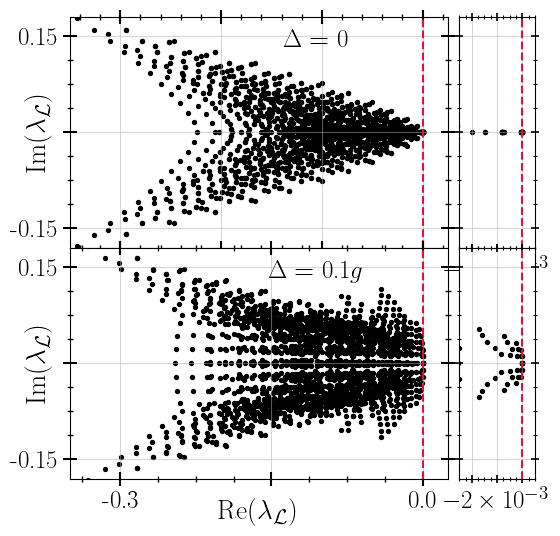

In [307]:
# Zoom region
xlim_zoom = (-0.005, 0.001)
ylim_zoom = (-0.18, 0.18)
# Create figure with GridSpec
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(nrows=2, ncols=2, width_ratios=[1, 0.2], height_ratios=[1, 1], wspace=0.05, hspace=0)

axes_main = [fig.add_subplot(gs[i, 0]) for i in range(2)]
axes_zoom = [fig.add_subplot(gs[i, 1]) for i in range(2)]

# Plot
for ax_main, ax_zoom, evals, case in zip(axes_main, axes_zoom, spectra, cases):
    # Full spectra (left)
    ax_main.scatter(np.real(evals), np.imag(evals), s=8, color='k')
    ax_main.axvline(0, linestyle='--', color='crimson')
    ax_main.set_ylabel(r"Im($\lambda_\mathcal{L}$)", labelpad=-30)
    ax_main.set_xlim(-0.35, 0.025)
    ax_main.set_yticks([-0.15,0,0.15])
    ax_main.set_ylim(ylim_zoom)
    ax_main.set_yticklabels([-0.15, '', 0.15])
    ax_main.tick_params(which='both', direction='inout', top=True, right=True, bottom=True, left=True)
    ax_main.minorticks_on()
    ax_main.tick_params(axis='both', which='major', length=10, width=1.5)
    ax_main.tick_params(axis='both', which='minor', length=5, width=1)
    ax_main.grid(True, alpha=0.5)

    # Zoomed spectra (right)
    ax_zoom.scatter(np.real(evals), np.imag(evals), s=8, color='k')
    ax_zoom.axvline(0, linestyle='--', color='crimson')
    ax_zoom.set_yticks([-0.15,0,0.15], ['','',''])
    ax_zoom.set_xticks([-0.004,-0.002,0], ['', r'$-2\times 10^{-3}$', ''])
    ax_zoom.set_xlim(xlim_zoom)
    ax_zoom.set_ylim(ylim_zoom)
    ax_zoom.tick_params(which='both', direction='inout', top=True, right=True, bottom=True, left=True)
    ax_zoom.minorticks_on()
    ax_zoom.tick_params(axis='both', which='major', length=6, width=1.2)
    ax_zoom.tick_params(axis='both', which='minor', length=3, width=0.8)
    ax_zoom.grid(True, alpha=0.5)

# Shared x-label
axes_main[-1].set_xlabel(r"Re($\lambda_\mathcal{L}$)", labelpad=-10)
axes_main[-1].set_xticks([-0.3, -0.15, 0])
axes_main[-1].set_xticklabels([-0.3, '', 0.0])

# Add text on top of the left upper panel
axes_main[0].text(0.65, 0.85, r"$\mathrm{\Delta}=0$", transform=axes_main[0].transAxes,
                  ha='center', va='bottom')

# Add text on top of the left lower panel
axes_main[1].text(0.65,0.85, r"$\mathrm{\Delta}=0.1g$", transform=axes_main[1].transAxes,
                  ha='center', va='bottom')


# plt.tight_layout()
# plt.show()
plt.savefig('../figs_for_paper/spin1-2_spectrum.svg')


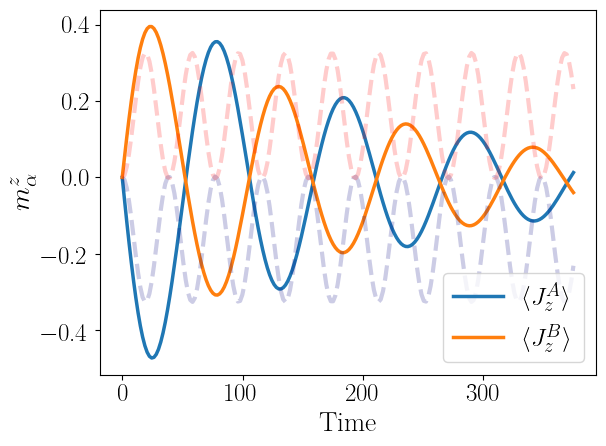

In [ ]:
# # ────────────────────────
# #  PARAMETERS
# # ────────────────────────
# N_A   = 7        # number of TLS in species A
# N_B   = 7        # number of TLS in species B
# N = N_A + N_B  # total number

# ###Original parameters
# kappa = 1.0
# g = 0.1*kappa
# eta = 1.5*g

# #Rescaled
# Gamma = 4*g**2/kappa
# Xi = 2*g*eta/kappa

# DeltaA = 0.1*g 
# DeltaB = 0.1*g

# phi = np.pi         # Phase factor

# # ────────────────────────
# #  COLLECTIVE SPIN OPERATORS 
# # ────────────────────────

# Jx_A, Jy_A, Jz_A = piqs.jspin(N_A)                    
# Jp_A             = piqs.jspin(N_A, "+")
# Jm_A             = piqs.jspin(N_A, "-")

# Jx_B, Jy_B, Jz_B = piqs.jspin(N_B)                    
# Jp_B             = piqs.jspin(N_B, "+")
# Jm_B             = piqs.jspin(N_B, "-")

# # Subspace dimensions
# dimA = Jz_A.shape[0]
# dimB = Jz_B.shape[0]

# # Lift to full tensor product of the two symmetric subspaces
# Jz_A = tensor(Jz_A, qeye(dimB))
# Jp_A = tensor(Jp_A, qeye(dimB))
# Jm_A = tensor(Jm_A, qeye(dimB))
# Jz_B = tensor(qeye(dimA), Jz_B)
# Jp_B = tensor(qeye(dimA), Jp_B)
# Jm_B = tensor(qeye(dimA), Jm_B)

# # ────────────────────────
# #  INITIAL STATE: all spins in +x
# # ────────────────────────
# # spin_coherent(j, θ, φ) builds |θ,φ⟩ for a spin-j: 
# # here j = N/2, θ=π/2, φ=0 ⇒ +x polarization :contentReference[oaicite:2]{index=2}
# rhoA = piqs.css(N_A, x=np.pi/2, y=0, basis='dicke', coordinates='polar')
# rhoB = piqs.css(N_B, x=np.pi/2, y=0, basis='dicke', coordinates='polar')

# rho0 = tensor(rhoA, rhoB)

# # ────────────────────────
# #  HAMILTONIAN
# # ────────────────────────
# drive_A = (Jm_A - Jp_A)
# drive_B = (np.exp(-1j*phi)*Jm_B - np.exp(1j*phi)*Jp_B)
# H = -DeltaA*Jz_A - DeltaB*Jz_B + 1j*Xi*(drive_A + drive_B)

# # ────────────────────────
# #  COLLAPSE OPERATORS
# # ────────────────────────
# # single collective collapse in symmetric basis
# c_ops = [ np.sqrt(Gamma/N_A)*(Jm_A + np.exp(-1j*phi)*Jm_B) ]

# # ────────────────────────
# #  TIME EVOLUTION
# # ────────────────────────
# tlist = np.linspace(0, 15/Gamma, 200)
# # measure ⟨Jz⟩ of each species
# e_ops = [Jz_A, Jz_B]

# result = mesolve(H, rho0, tlist, c_ops, e_ops)

# # ────────────────────────
# #  PLOT
# # ────────────────────────
# data_mf1 = np.loadtxt("mf_data1.txt")
# data_mf2 = np.loadtxt("mf_data2.txt")

# plt.plot(tlist, result.expect[0]/N_A, label=r'$\langle J_z^A\rangle$', lw=2.5)
# plt.plot(tlist, result.expect[1]/N_B, label=r'$\langle J_z^B\rangle$', lw=2.5)
# plt.plot(tlist, data_mf1, lw=3, color='navy', linestyle='--', alpha=0.2)
# plt.plot(tlist, data_mf2, lw=3, color='red', linestyle='--', alpha=0.2)   
# plt.xlabel('Time')
# plt.ylabel(r'$m^z_{\alpha}$')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [352]:
evals, evecs = L.eigenstates()  


# optional: sort by real part (descending) to reproduce your previous plotting order
sorted_idx = np.argsort(-np.real(evals))
evals = evals[sorted_idx]
evecs = [evecs[k] for k in sorted_idx]

In [353]:
evals

array([ 2.50539120e-17+1.71930339e-17j, -1.24818552e-17-2.77098194e-18j,
       -3.83532997e-17+7.98145111e-19j, -1.74073916e-04+1.05475345e-02j,
       -1.74073916e-04-1.05475345e-02j, -2.08364738e-03+1.10565638e-02j,
       -2.08364738e-03-1.10565638e-02j, -2.36224460e-03+2.05823646e-02j,
       -2.36224460e-03-2.05823646e-02j, -1.81588941e-02-2.87031267e-03j,
       -1.81588941e-02+2.87031267e-03j, -1.83519225e-02-1.35449237e-02j,
       -1.83519225e-02+1.35449237e-02j, -1.90219077e-02-2.41659225e-02j,
       -1.90219077e-02+2.41659225e-02j, -1.97574585e-02-1.39268765e-02j,
       -1.97574585e-02+1.39268765e-02j, -2.73773762e-02-1.90540502e-02j,
       -2.73773762e-02+1.90540502e-02j, -2.78735524e-02+2.70345873e-02j,
       -2.78735524e-02-2.70345873e-02j, -3.00000000e-02-8.26212294e-18j,
       -3.61005827e-02+1.13744258e-17j, -3.79402089e-02-6.67394382e-04j,
       -3.79402089e-02+6.67394382e-04j, -3.81583549e-02+1.11911986e-02j,
       -3.81583549e-02-1.11911986e-02j, -3.99603440

In [354]:
op = vector_to_operator(Qobj(sum(evecs[i] for i in range(3,4))))

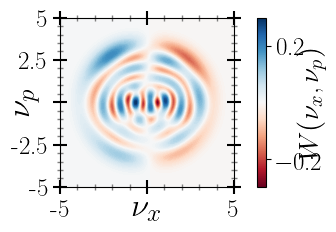

In [355]:
x = np.linspace(-5, 5, 200)
p = np.linspace(-5, 5, 200)

fig,ax = plt.subplots(figsize=(3, 2.2))   

# Call plot_wigner using your figure
fig, ax = plot_wigner(op, x, p, colorbar=True, fig=fig, ax=ax)

# Customize labels
ax.set_xlabel(r"$\nu_x$", fontsize=24, labelpad=-20)
ax.set_ylabel(r"$\nu_p$", fontsize=24, labelpad=-20)

ax.tick_params(which='both', direction='inout', 
                top=True, right=True, bottom=True, left=True)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', 
                length=10, width=1.5, colors='black')
ax.tick_params(axis='both', which='minor', 
                length=5, width=1, colors='gray')
ax.set_yticks([-5,-2.5,0,2.5,5], [-5, -2.5,'',2.5,5] )
ax.set_xticks([-5,0,5], [-5, '', 5] )
cbar_ax = fig.axes[-1]

# Set colorbar label
cbar_ax.set_ylabel(r"$W(\nu_x,\nu_p)$", labelpad=-20, fontsize=20)


# Set specific tick locations and labels
cbar_ax.set_yticks([-0.2,  0.2])

plt.savefig('Wigner_D001_phi0.svg')

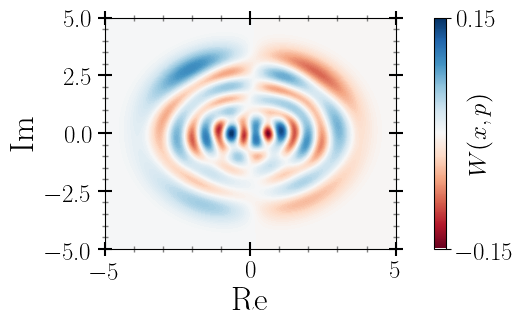

In [ ]:
x = np.linspace(-5, 5, 200)
p = np.linspace(-5, 5, 200)

fig,ax = plt.subplots(figsize=(5, 3))   

fig, ax = plot_wigner(op, x, p, colorbar=True, fig=fig, ax=ax)


ax.set_xlabel("Re", fontsize=24)
ax.set_ylabel("Im", fontsize=24)

ax.tick_params(which='both', direction='inout', 
                top=True, right=True, bottom=True, left=True)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', 
                length=10, width=1.5, colors='black')
ax.tick_params(axis='both', which='minor', 
                length=5, width=1, colors='gray')

cbar_ax = fig.axes[-1]

cbar_ax.set_ylabel(r"$W(x,p)$", fontsize=18, labelpad=-35)

cbar_ax.set_yticks([-0.12, 0.12])

# im = ax.images[0]
# im.set_clim(-0.1, 0.1)

plt.show()

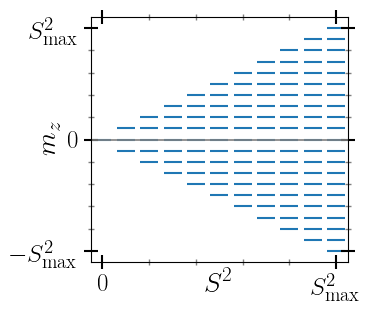

In [408]:
# Scatter plot for Dicke states |S^2,m_z>

N = 20
S_values = np.arange(N/2, -0.1, -1)  

points_x = []
points_y = []

# Build all (S, M_z) allowed combinations
for S in S_values:
    M_vals = np.arange(-S, S+1, 1)
    points_x.extend([S]*len(M_vals))
    points_y.extend(M_vals)

# Plot
fig, ax = plt.subplots(figsize=(3.5*1.15,3*1.15))
plt.axhline(0, color='k', lw=1.2, c='grey')
plt.scatter(points_x, points_y, s=150, marker='_')  

plt.xlabel(r"$S^2$", labelpad=-20)
plt.ylabel(r"$m_z$", labelpad=-37)

# Improve visual clarity
plt.xticks([0, 10], [0, r'$S^2_\mathrm{max}$'])
plt.yticks([-10,0, 10], [r'$-S^2_\mathrm{max}$', 0, r'$S^2_\mathrm{max}$'])

ax.tick_params(which='both', direction='inout', 
                top=True, right=True, bottom=True, left=True)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', 
                length=10, width=1.5, colors='black')
ax.tick_params(axis='both', which='minor', 
                length=5, width=1, colors='gray')
plt.tight_layout()
# plt.show()
plt.savefig('../supmat/dicke_states.svg')